# Table Joins & Choropleth Plotting

This time we'll join a table of US Census data to a Census Tract shapefile and create a choropleth map of the results.

    >>> import pandas as pd
    >>> import geopandas as gpd
    >>> import matplotlib.pyplot as plt
    >>> import os

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import os

##### Important! Reset your working directory to your home folder. Only run this once!
    >>> os.chdir('../')
    >>> os.getcwd()

In [2]:
os.chdir('../')
os.getcwd()

'/home/jupyter-phwh9568'

#### Start by importing the Boulder_Co_Tracts shapefile as a variable:
    >>> BoulderTracts = gpd.read_file('workshopdata/Boulder_Co_Tracts.shp')
    >>> BoulderTracts

In [3]:
BoulderTracts = gpd.read_file('workshopdata/Boulder_Co_Tracts.shp')
BoulderTracts

,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
0,08,013,013003,08013013003,130.03,Census Tract 130.03,G5020,S,12252859,78207,+40.0013526,-105.1514239,"POLYGON ((-105.13109 40.00154, -105.13109 40.0..."
1,08,013,013401,08013013401,134.01,Census Tract 134.01,G5020,S,3155622,155711,+40.1627988,-105.0908850,"POLYGON ((-105.08818 40.16835, -105.08818 40.1..."
2,08,013,013503,08013013503,135.03,Census Tract 135.03,G5020,S,1950407,0,+40.1812420,-105.0953408,"POLYGON ((-105.10238 40.18126, -105.10238 40.1..."
3,08,013,013006,08013013006,130.06,Census Tract 130.06,G5020,S,3221668,12060,+39.9695323,-105.1432150,"POLYGON ((-105.12781 39.97365, -105.12783 39.9..."
4,08,013,012203,08013012203,122.03,Census Tract 122.03,G5020,S,6477498,189307,+40.0271350,-105.2390499,"POLYGON ((-105.23485 40.03552, -105.23522 40.0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,08,013,012904,08013012904,129.04,Census Tract 129.04,G5020,S,3149613,264960,+39.9967159,-105.1141282,"POLYGON ((-105.10962 40.00018, -105.10914 40.0..."
64,08,013,012707,08013012707,127.07,Census Tract 127.07,G5020,S,30448599,4306832,+40.0339193,-105.1840578,"POLYGON ((-105.23485 40.03552, -105.23481 40.0..."
65,08,013,012905,08013012905,129.05,Census Tract 129.05,G5020,S,1330229,0,+39.9942676,-105.0959567,"POLYGON ((-105.09232 40.00023, -105.09147 40.0..."
66,08,013,012103,08013012103,121.03,Census Tract 121.03,G5020,S,2305549,2740,+40.0460539,-105.2682770,"POLYGON ((-105.25861 40.03646, -105.25903 40.0..."


#### Now, we'll read the Boulder_Co_MHHI csv file into a non-spatial Pandas dataframe:
    >>> BoulderMHHI = pd.read_csv('workshopdata/Boulder_Co_MHHI.csv')
    >>> BoulderMHHI

In [4]:
BoulderMHHI = pd.read_csv('workshhopdata/Boulder_Co_MHHI.csv')
BoulderMHHI

,GEOID10,Tract,State,State_FIPS,Count_FIPS,Tract_FIPS,FIPS,Area_Land,Area_Water,MHHI2014
0,8013012101,"Census Tract 121.01, Boulder County, Colorado",co,8,13,12101,14000US08013012101,2859895,0,101328
1,8013012102,"Census Tract 121.02, Boulder County, Colorado",co,8,13,12102,14000US08013012102,2882035,0,63333
2,8013012103,"Census Tract 121.03, Boulder County, Colorado",co,8,13,12103,14000US08013012103,2305549,2740,87708
3,8013012104,"Census Tract 121.04, Boulder County, Colorado",co,8,13,12104,14000US08013012104,2700890,96592,87875
4,8013012105,"Census Tract 121.05, Boulder County, Colorado",co,8,13,12105,14000US08013012105,2475536,470,66885
...,...,...,...,...,...,...,...,...,...,...
63,8013060700,"Census Tract 607, Boulder County, Colorado",co,8,13,60700,14000US08013060700,10020054,82697,107273
64,8013060800,"Census Tract 608, Boulder County, Colorado",co,8,13,60800,14000US08013060800,21250339,150276,44246
65,8013060900,"Census Tract 609, Boulder County, Colorado",co,8,13,60900,14000US08013060900,7699944,28819,74954
66,8013061300,"Census Tract 613, Boulder County, Colorado",co,8,13,61300,14000US08013061300,2106503,6895,151743


#### Which column should we base the join on?
Take a close look at GEOID10:  

    >>> print(BoulderMHHI.GEOID10)
    >>> print(BoulderTracts.GEOID10)

In [5]:
print(BoulderMHHI.GEOID10)
print(BoulderTracts.GEOID10)

0     8013012101
1     8013012102
2     8013012103
3     8013012104
4     8013012105
         ...    
63    8013060700
64    8013060800
65    8013060900
66    8013061300
67    8013061400
Name: GEOID10, Length: 68, dtype: int64
0     08013013003
1     08013013401
2     08013013503
3     08013013006
4     08013012203
         ...     
63    08013012904
64    08013012707
65    08013012905
66    08013012103
67    08013012800
Name: GEOID10, Length: 68, dtype: object


### Arrrgh! Classic problem. Stripped leading zeros when importing the csv. 

#### Good new: this is easy to fix. Reimport the BoulderMHHI csv and tell pandas to read the GEOID10 column as a string instead of a number:
    >>> BoulderMHHI = pd.read_csv('workshopdata/Boulder_Co_MHHI.csv', dtype={'GEOID10':str})
    >>> BoulderMHHI

In [6]:
BoulderMHHI = pd.read_csv('workshopdata/Boulder_Co_MHHI.csv', dtype={"GEOID10":str})
BoulderMHHI

,GEOID10,Tract,State,State_FIPS,Count_FIPS,Tract_FIPS,FIPS,Area_Land,Area_Water,MHHI2014
0,08013012101,"Census Tract 121.01, Boulder County, Colorado",co,8,13,12101,14000US08013012101,2859895,0,101328
1,08013012102,"Census Tract 121.02, Boulder County, Colorado",co,8,13,12102,14000US08013012102,2882035,0,63333
2,08013012103,"Census Tract 121.03, Boulder County, Colorado",co,8,13,12103,14000US08013012103,2305549,2740,87708
3,08013012104,"Census Tract 121.04, Boulder County, Colorado",co,8,13,12104,14000US08013012104,2700890,96592,87875
4,08013012105,"Census Tract 121.05, Boulder County, Colorado",co,8,13,12105,14000US08013012105,2475536,470,66885
...,...,...,...,...,...,...,...,...,...,...
63,08013060700,"Census Tract 607, Boulder County, Colorado",co,8,13,60700,14000US08013060700,10020054,82697,107273
64,08013060800,"Census Tract 608, Boulder County, Colorado",co,8,13,60800,14000US08013060800,21250339,150276,44246
65,08013060900,"Census Tract 609, Boulder County, Colorado",co,8,13,60900,14000US08013060900,7699944,28819,74954
66,08013061300,"Census Tract 613, Boulder County, Colorado",co,8,13,61300,14000US08013061300,2106503,6895,151743


## Hell yeah! Fixed it!

#### Now let's do our join:
    >>> BoulderMHHI_Tracts = Bouldertracts.merge(BoulderMHHI, on = 'GEOID10')

In [7]:
BoulderMHHI_Tracts = BoulderTracts.merge(BoulderMHHI, on = 'GEOID10')

#### Done! Now view the results:
    >>> BoulderMHHI_Tracts

In [8]:
BoulderMHHI_Tracts

,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,...,geometry,Tract,State,State_FIPS,Count_FIPS,Tract_FIPS,FIPS,Area_Land,Area_Water,MHHI2014
0,08,013,013003,08013013003,130.03,Census Tract 130.03,G5020,S,12252859,78207,...,"POLYGON ((-105.13109 40.00154, -105.13109 40.0...","Census Tract 130.03, Boulder County, Colorado",co,8,13,13003,14000US08013013003,12252859,78207,80108
1,08,013,013401,08013013401,134.01,Census Tract 134.01,G5020,S,3155622,155711,...,"POLYGON ((-105.08818 40.16835, -105.08818 40.1...","Census Tract 134.01, Boulder County, Colorado",co,8,13,13401,14000US08013013401,3155622,155711,31279
2,08,013,013503,08013013503,135.03,Census Tract 135.03,G5020,S,1950407,0,...,"POLYGON ((-105.10238 40.18126, -105.10238 40.1...","Census Tract 135.03, Boulder County, Colorado",co,8,13,13503,14000US08013013503,1950407,0,38837
3,08,013,013006,08013013006,130.06,Census Tract 130.06,G5020,S,3221668,12060,...,"POLYGON ((-105.12781 39.97365, -105.12783 39.9...","Census Tract 130.06, Boulder County, Colorado",co,8,13,13006,14000US08013013006,3221668,12060,90865
4,08,013,012203,08013012203,122.03,Census Tract 122.03,G5020,S,6477498,189307,...,"POLYGON ((-105.23485 40.03552, -105.23522 40.0...","Census Tract 122.03, Boulder County, Colorado",co,8,13,12203,14000US08013012203,6477498,189307,47027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,08,013,012904,08013012904,129.04,Census Tract 129.04,G5020,S,3149613,264960,...,"POLYGON ((-105.10962 40.00018, -105.10914 40.0...","Census Tract 129.04, Boulder County, Colorado",co,8,13,12904,14000US08013012904,3149613,264960,77934
64,08,013,012707,08013012707,127.07,Census Tract 127.07,G5020,S,30448599,4306832,...,"POLYGON ((-105.23485 40.03552, -105.23481 40.0...","Census Tract 127.07, Boulder County, Colorado",co,8,13,12707,14000US08013012707,30448599,4306832,63063
65,08,013,012905,08013012905,129.05,Census Tract 129.05,G5020,S,1330229,0,...,"POLYGON ((-105.09232 40.00023, -105.09147 40.0...","Census Tract 129.05, Boulder County, Colorado",co,8,13,12905,14000US08013012905,1330229,0,55699
66,08,013,012103,08013012103,121.03,Census Tract 121.03,G5020,S,2305549,2740,...,"POLYGON ((-105.25861 40.03646, -105.25903 40.0...","Census Tract 121.03, Boulder County, Colorado",co,8,13,12103,14000US08013012103,2305549,2740,87708


#### Great! Notice all the extra columns. 

#### Generating a choropleth couldn't be easier:
    >>> BoulderMHHI_Tracts.plot('MHHI2014')

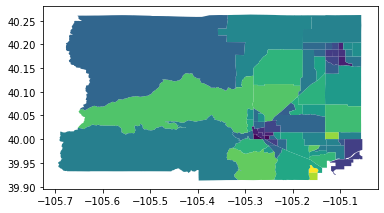

In [9]:
BoulderMHHI_Tracts.plot('MHHI2014')

#### SWEET MAP! But maybe different colors would be cool too. Check this out:
    >>> BoulderMHHI_Tracts.plot('MHHI2014', cmap='RdYlGn', figsize=(10,10))

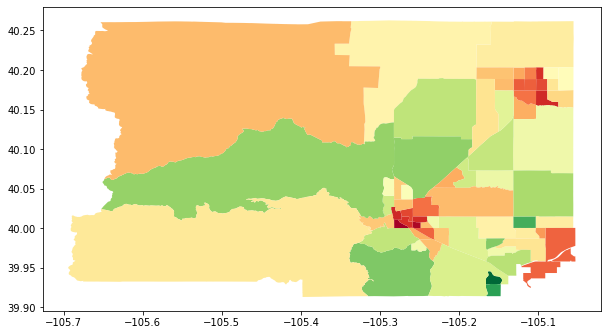

In [10]:
BoulderMHHI_Tracts.plot('MHHI2014', cmap='RdYlGn', figsize=(10,10))

#### v. Rad. 

#### Now, take the BoulderMHHI_Tracts variable and write it to a new geojson file:
    >>> BoulderMHHI_Tracts.to_file('Data/BoulderMHHI_Tracts.geojson', driver='GeoJSON')

In [11]:
BoulderMHHI_Tracts.to_file('Data/BoulderMHHI_Tracts.geojson', driver='GeoJSON')